<img src="https://pa-legg.github.io/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics 23-24

## Portfolio Assignment: Worksheet 1
## Investigate a web server application logs to identify malicious attack activity using Python data science libraries
---

For this task, the company **"UWEtech"** have enlisted your support as a security data analyst. They suspect some kind of attack on their web server application, however they are unable to diagnose what has happened exactly, or which of their users have caused the attack. The company have provided you with their recent log data records. You will need to complete a series of tasks to examine the data further, and then expand your investigation to uncover any malicious activity.

**Dataset**: You will be randomly issued a **unique dataset** based on your UWE username - **failure to use the dataset assigned to your username will result in a zero grade**. Please see the folder ***"Portfolio Assignment"*** under the Assignment tab on Blackboard for further detail related to the access and download of the necessary dataset.

### Assessment and Marking
---
The completion of this worksheet is worth **20%** of your portfolio assignment for the UFCFFY-15-M Cyber Security Analytics (CSA) module. Each question states the possible marks available for a correct answer. Where a question is worth more than 1 mark, a partial solution to the question may warrant partial marks.

### Submission Documents
---

Your submission for this task should include:

- **1 Jupyter Notebook file (*.ipynb)** 

You should complete your work using the ipynb file provided (i.e., this document). Once you have completed your work, you should ensure that all code cells have been executed and then you should save your notebook. **Please note: Staff will NOT execute your notebook during marking. It is your responsibility to ensure that your saved notebook shows the code cell outputs as required.**

The deadline for your portfolio submission is **THURSDAY 2ND MAY @ 14:00**. This assignment is eligible for the [48-hour late submission window](https://www.uwe.ac.uk/study/academic-information/personal-circumstances/late-submission-window), however module staff will not be able to assist with any queries after the deadline.

Your portfolio submitted to Blackboard must contain 3 independent documents:

- ***STUDENT_ID-TASK1.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK2.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK3.pdf*** (a PDF report of your research investigation)

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You should use the [online Q&A form](https://forms.office.com/e/yxFJZDraRG) to ask questions related to this module and this assignment, as well as utilising the on-site teaching sessions.

---

# Student ID: 23008852

- **By submitting this assignment to Blackboard as part of your portfolio, I declare that the submission is my own work.**

***

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
pd.set_option('display.max_rows', 20)

In the cell below, you will need to change `data_file` to your own specific data filename. The example data file is purely to demonstrate some initial steps for your investigation and should not be used.

In [2]:
data_file = './y232-wang_2024jan_dataset.txt'

In [3]:
# Load in the data set as required
data = pd.read_csv(data_file, sep=r'\s+')
# original
# data = pd.read_csv(data_file, delim_whitespace=True)
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data['datetime'] = pd.to_datetime(data['date'] + " " + data['time'])
data

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2023-01-01,00:24:00,167.167.244.11,GET,gtbmiuyo.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,-,200,0,0,27,2023-01-01 00:24:00
1,2023-01-01,00:24:00,167.167.244.11,GET,index.aspx,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,-,200,0,0,22,2023-01-01 00:24:00
2,2023-01-01,00:24:28,167.167.244.11,GET,favico.ico,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,200,0,0,23,2023-01-01 00:24:28
3,2023-01-01,00:24:28,167.167.244.11,GET,gcjnjeej.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,404,0,0,23,2023-01-01 00:24:28
4,2023-01-01,00:24:28,167.167.244.11,GET,main.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,200,0,0,29,2023-01-01 00:24:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350591,2023-01-30,23:55:45,167.167.244.11,GET,transactions.aspx,page=1,443,um821644,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,200,0,0,24,2023-01-30 23:55:45
350592,2023-01-30,23:56:06,167.167.244.11,GET,footer.css,-,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,200,0,0,22,2023-01-30 23:56:06
350593,2023-01-30,23:56:06,167.167.244.11,GET,ttcsdmrb.js,v=746817,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,200,0,0,20,2023-01-30 23:56:06
350594,2023-01-30,23:56:06,167.167.244.11,GET,phekuflm.css,-,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,404,0,0,22,2023-01-30 23:56:06


### Question 1: Show how often each of the unique machines (defined by client IP address 'c-ip') have accessed this web server application? (1 Mark)

*Hint: Think about how you would count the occurrence of all possible values within a Dataframe column.*

In [4]:
# Q1 ANSWER
# Count the unique client IP addresses and print the outputs in order
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)

df = pd.DataFrame(data['c-ip'])

# count the numbers of each client IP address by following the original order in the array

f_cip = pd.DataFrame(factor_col(df['c-ip']))

# c-ips are sorted in a desending order
sort_f_cip = f_cip.sort_values('count', ascending=False)
sort_f_cip

,count
198.169.194.238,332
89.43.49.3,280
135.244.31.76,272
194.245.32.53,221
94.177.126.101,155
...,...
45.85.127.121,20
185.184.115.39,20
195.82.125.220,19
45.95.10.120,19


### Question 2: Show how often each of the possible unique URLs (defined by 'cs(Referer)') have been accessed within the dataset? (1 Mark)

*Hint: Think about how you would count the occurrence of all possible values within a Dataframe column.*

In [5]:

# Q2 ANSWER
# Count the possible unique URLs 'cs(Referer)'
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)
    
# Count the numbers of the possible unique URLs 'cs(Referer)'
# Including '-'
df = pd.DataFrame(data['cs(Referer)'])
cre_ct = factor_col(df['cs(Referer)'])

# Remove '-' URLs

rrt_df = data[data['cs(Referer)'] != "-"]

# Count the numbers of the possible unique URLs 'cs(Referer)'
# Without '-'
cre = rrt_df['cs(Referer)']
cre_ct_02 = pd.Series(cre).value_counts()
pd.DataFrame(cre_ct_02)

,count
cs(Referer),
https://uwetech.co.uk/transactions.aspx,117177
https://uwetech.co.uk/index.aspx,90058
https://uwetech.co.uk/login.aspx,66459
https://uwetech.co.uk/account_status.aspx,31088
https://uwetech.co.uk/transfer.aspx,8782
https://uwetech.co.uk/changepassword.aspx,3127
https://uwetech.co.uk/faq.aspx,1844
https://uwetech.co.uk/transfer_complete.aspx,1496
https://uwetech.co.uk/change_avatar.aspx,610


### Question 3: Show how often each client IP has accessed each URL? (1 Mark)

*Hint: Think about how you would count the occurrence of all possible pairs of values within multiple Dataframe columns.*

In [6]:
# Q3 ANSWER
# all '-' in URLs are removed in rrt_df 
xtab = pd.crosstab(rrt_df['c-ip'], rrt_df['cs(Referer)'])
xtab

cs(Referer),https://uwetech.co.uk/account_status.aspx,https://uwetech.co.uk/change_avatar.aspx,https://uwetech.co.uk/changepassword.aspx,https://uwetech.co.uk/faq.aspx,https://uwetech.co.uk/index.aspx,https://uwetech.co.uk/login.aspx,https://uwetech.co.uk/transactions.aspx,https://uwetech.co.uk/transfer.aspx,https://uwetech.co.uk/transfer_complete.aspx
c-ip,,,,,,,,,
101.167.223.24,4,0,0,0,14,9,31,4,0
102.129.155.160,2,0,7,0,11,7,8,0,0
102.129.64.24,7,0,0,0,16,18,18,0,0
102.132.118.223,7,0,0,0,19,12,24,0,0
102.165.17.153,4,0,0,0,7,7,9,0,0
...,...,...,...,...,...,...,...,...,...
95.87.102.7,2,0,0,0,9,7,17,6,0
96.6.242.135,6,0,6,0,19,11,22,0,0
99.82.169.124,7,0,0,0,19,14,23,0,0


### Question 4: Filter the data to show all rows where 'cs-uri-query' starts with the string 'v='. (1 Mark)

In [7]:
# Q4 ANSWER

# Extract all rows where 'cs-uri-query' starts with the string 'v='
df = pd.DataFrame(data)

df['cuq'] = df['cs-uri-query']
df['cuq'] = df['cuq'].str.contains('v=', regex=True)
df[df['cuq'] == True ]


,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime,cuq
7,2023-01-01,00:24:46,167.167.244.11,GET,template.css,v=vbdhwsnk,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,200,0,0,21,2023-01-01 00:24:46,True
21,2023-01-01,00:26:26,167.167.244.11,GET,cvppenru.js,v=385746,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,23,2023-01-01 00:26:26,True
24,2023-01-01,00:26:50,167.167.244.11,GET,aucmigtu.js,v=529178,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,30,2023-01-01 00:26:50,True
30,2023-01-01,00:27:25,167.167.244.11,GET,btnjzjas.js,v=389361,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,26,2023-01-01 00:27:25,True
32,2023-01-01,00:27:25,167.167.244.11,GET,template.css,v=cdpginre,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,24,2023-01-01 00:27:25,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350551,2023-01-30,23:36:04,167.167.244.11,GET,template.css,v=ninqvvzh,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/account_status.aspx,200,0,0,23,2023-01-30 23:36:04,True
350556,2023-01-30,23:36:30,167.167.244.11,GET,iapbjxvb.js,v=920035,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,29,2023-01-30 23:36:30,True
350559,2023-01-30,23:36:42,167.167.244.11,GET,gpqoymli.js,v=813268,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,23,2023-01-30 23:36:42,True
350573,2023-01-30,23:54:34,167.167.244.11,GET,template.css,v=usxjtpda,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/index.aspx,200,0,0,23,2023-01-30 23:54:34,True


### Question 5: Filter the data to show all rows where 'cs(User-Agent)' contain the string 'Win64? (1 Mark)

In [8]:
# Q5 ANSWER
df = pd.DataFrame(data)
# Extract all rows where 'cs(User-Agent)' contain the string 'Win64'
df['cua'] = df['cs(User-Agent)']
df['cua_win64'] = df['cua'].str.contains('Win64', regex=True )
df[df['cua_win64'] == True ]

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime,cua,cua_win64
41,2023-01-01,01:50:00,167.167.244.11,GET,favico.ico,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27,2023-01-01 01:50:00,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
42,2023-01-01,01:50:00,167.167.244.11,GET,index.aspx,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21,2023-01-01 01:50:00,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
43,2023-01-01,01:50:05,167.167.244.11,GET,footer.css,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,20,2023-01-01 01:50:05,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
44,2023-01-01,01:50:05,167.167.244.11,GET,index.aspx,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,26,2023-01-01 01:50:05,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
45,2023-01-01,01:50:21,167.167.244.11,GET,footer.css,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,24,2023-01-01 01:50:21,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350563,2023-01-30,23:37:02,167.167.244.11,GET,cpthgxry.css,-,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,404,0,0,27,2023-01-30 23:37:02,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
350564,2023-01-30,23:37:02,167.167.244.11,GET,transactions.aspx,page=5,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,25,2023-01-30 23:37:02,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
350565,2023-01-30,23:37:20,167.167.244.11,GET,favico.ico,-,443,-,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,25,2023-01-30 23:37:20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
350566,2023-01-30,23:37:20,167.167.244.11,GET,main.css,-,443,-,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,21,2023-01-30 23:37:20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True


### Question 6: Filter the data to show all rows where 'sc-status' is equal to 404, before 07:00AM? (1 Mark)

In [9]:
# Q6 ANSWER
# Extract all rows where 'sc-status' is equal to 404, before 07:00AM
df = pd.DataFrame(data)
ss_df = df[(df['sc-status'] == 404) & (pd.to_datetime(df['time']) < pd.to_datetime('07:00:00')) ]
ss_df

C:\Users\lesmo\AppData\Local\Temp\ipykernel_17324\3236956486.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ss_df = df[(df['sc-status'] == 404) & (pd.to_datetime(df['time']) < pd.to_datetime('07:00:00')) ]


,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
3,2023-01-01,00:24:28,167.167.244.11,GET,gcjnjeej.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,404,0,0,23,2023-01-01 00:24:28
6,2023-01-01,00:24:46,167.167.244.11,GET,xbiklmrm.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,404,0,0,28,2023-01-01 00:24:46
18,2023-01-01,00:25:57,167.167.244.11,GET,wwypwlwh.css,-,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/account_status.aspx,404,0,0,23,2023-01-01 00:25:57
27,2023-01-01,00:27:20,167.167.244.11,GET,haewjbil.css,-,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,404,0,0,29,2023-01-01 00:27:20
38,2023-01-01,00:28:05,167.167.244.11,GET,uqyxxljj.css,-,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,404,0,0,23,2023-01-01 00:28:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339290,2023-01-30,06:41:00,167.167.244.11,GET,erketzjl.css,-,443,-,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,-,404,0,0,24,2023-01-30 06:41:00
339302,2023-01-30,06:41:58,167.167.244.11,GET,ehozajkz.css,-,443,-,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,https://uwetech.co.uk/index.aspx,404,0,0,25,2023-01-30 06:41:58
339313,2023-01-30,06:43:05,167.167.244.11,GET,hyydbllh.css,-,443,zh670520,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,https://uwetech.co.uk/transactions.aspx,404,0,0,29,2023-01-30 06:43:05
339315,2023-01-30,06:43:17,167.167.244.11,GET,pzdkusmj.css,-,443,zh670520,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,https://uwetech.co.uk/transactions.aspx,404,0,0,26,2023-01-30 06:43:17


### Question 7: Plot a Bar Chart showing the number of entries for each value in 'sc-status'. (1 Mark)

*Hint: Matplotlib and Pandas are closely linked - some pandas functions have matplotlib functions embedded. Read the documentation for more detail.*


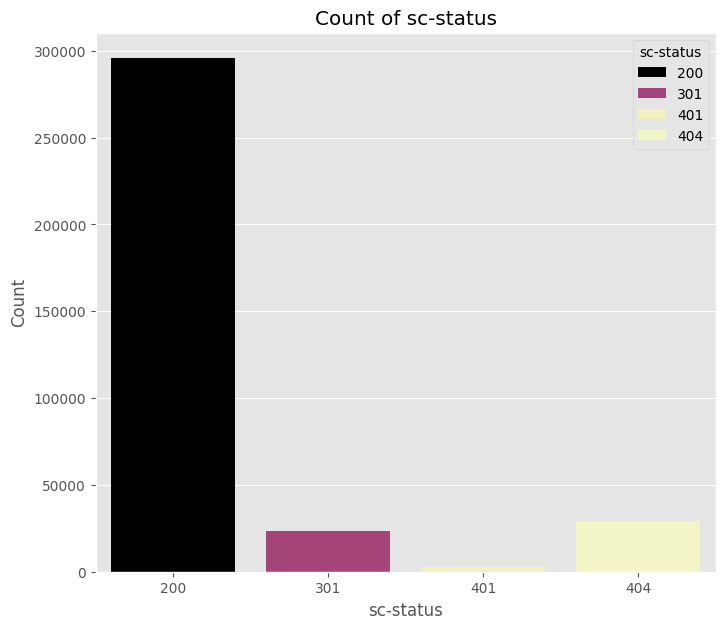

In [10]:
# Q7 ANSWER

plt.figure(figsize=(8,7))
sns.countplot(x='sc-status',data=data, hue='sc-status', palette='magma')
plt.title('Count of sc-status')  # Add title
plt.xlabel('sc-status')
plt.ylabel('Count')
plt.show()

### Question 8: Plot a line chart that shows the number of records (Y-axis) vs each day within the dataset (X-axis). (1 Mark)

In [11]:
df = pd.DataFrame(data)
# sort by date
da_ct = factor_col(df['date'])
da=da_ct.to_dict()
da

{'2023-01-01': 12301,
 '2023-01-02': 11204,
 '2023-01-03': 11219,
 '2023-01-04': 11583,
 '2023-01-05': 11833,
 '2023-01-06': 10701,
 '2023-01-07': 12620,
 '2023-01-08': 12385,
 '2023-01-09': 11276,
 '2023-01-10': 12542,
 '2023-01-11': 12293,
 '2023-01-12': 10382,
 '2023-01-13': 10703,
 '2023-01-14': 12616,
 '2023-01-15': 11229,
 '2023-01-16': 11337,
 '2023-01-17': 13060,
 '2023-01-18': 12110,
 '2023-01-19': 11862,
 '2023-01-20': 11884,
 '2023-01-21': 11670,
 '2023-01-22': 11400,
 '2023-01-23': 11981,
 '2023-01-24': 11377,
 '2023-01-25': 11022,
 '2023-01-26': 11859,
 '2023-01-27': 11323,
 '2023-01-28': 11039,
 '2023-01-29': 11832,
 '2023-01-30': 11953}

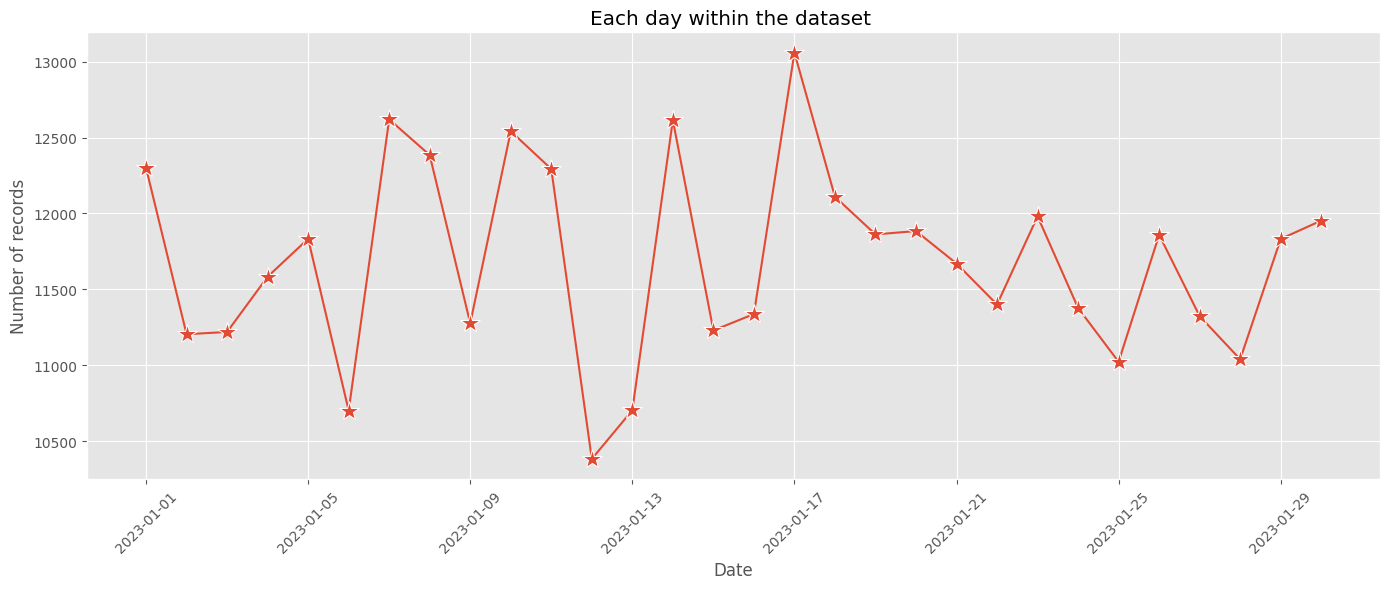

In [12]:
# Q8 ANSWER

# Convert the dictionary 'da' into a DataFrame
dff = pd.DataFrame(list(da.items()), columns=['Date', 'Value'])

# Set the 'Date' column as datetime type
dff['Date'] = pd.to_datetime(dff['Date'])

# Create line plot using seaborn
plt.figure(figsize=(14, 6)) 
sns.lineplot(x='Date', y='Value', data=dff, marker='*', markersize=15)
plt.title('Each day within the dataset ')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### (Advanced) Question 9: Filter and Plot a Network graph using the NetworkX library based on the criteria below (4 Marks)

* Filter the data to only the 20 most active IP addresses and plot this using a Network chart **(1 Mark)**.
* (Advanced) Scale each client node within the chart based on the amount of activity **(3 Marks)**.

In [13]:
# Q9 ANSWER
# Count the numbers
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)
    
# ----------------------------------------------------------------------------------------------------------
# Q9.1 Filter the data to only the 20 most active IP addresses and plot this using a Network chart (1 Mark).
# ----------------------------------------------------------------------------------------------------------

df = pd.DataFrame(data['c-ip'])

# count the numbers of each client IP address by following the original order in the array
f_cip = pd.DataFrame(factor_col(df['c-ip']))

s_cip = data['s-ip'].unique()
s_cip


array(['167.167.244.11'], dtype=object)

In [14]:
s_cip = {cip: 1 for cip in s_cip}
s_cip

{'167.167.244.11': 1}

In [15]:
# c-ips are sorted in a desending order
sort_f_cip = f_cip.sort_values('count', ascending=False)


# Top 20 Active IPs, sorted in descending order
net_ip = sort_f_cip[:20]
graph_dict = net_ip.to_dict()
node_data = graph_dict['count']
node_data

{'198.169.194.238': 332,
 '89.43.49.3': 280,
 '135.244.31.76': 272,
 '194.245.32.53': 221,
 '94.177.126.101': 155,
 '95.215.11.248': 149,
 '205.138.33.178': 145,
 '80.76.62.181': 145,
 '192.160.10.14': 144,
 '129.36.232.219': 143,
 '82.206.139.145': 142,
 '62.190.21.164': 141,
 '185.166.158.241': 140,
 '84.233.192.94': 139,
 '154.54.21.171': 139,
 '193.19.156.141': 138,
 '81.27.85.89': 138,
 '165.225.81.217': 138,
 '185.83.53.183': 137,
 '185.170.176.36': 137}

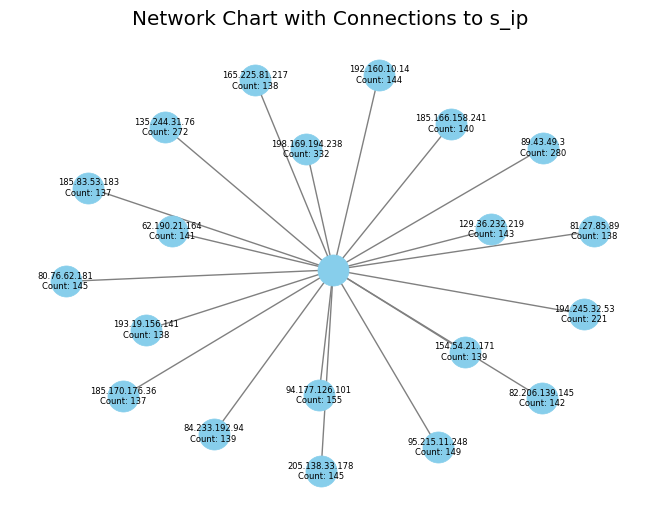

In [16]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph and set node sizes based on counts
for node, count in node_data.items():
    G.add_node(node, count=count)

# Add s_cip node(s)
for cip in s_cip:
    G.add_node(cip)

# Connect each node in node_data to s_cip node(s)
for node in node_data.keys():
    for cip in s_cip:
        G.add_edge(node, cip)

# Draw the network chart
nx.draw(G, with_labels=True, labels={node: f"{node}\nCount: {count}" for node, count in node_data.items()}, 
        node_color='skyblue', node_size=500, font_size=6, edge_color='gray')

plt.title("Network Chart with Connections to s_ip")
plt.show()

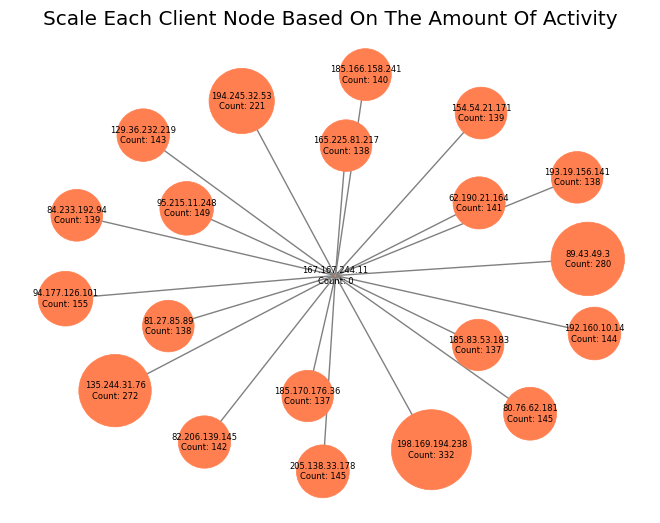

In [17]:

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph and set node sizes based on counts
for node, count in node_data.items():
    # Adjust the size based on count
    G.add_node(node, count=count, size=count * 10) 

# Add s_cip node(s)
for cip, size in s_cip.items():
    G.add_node(cip, size=size)

# Connect each node in node_data to s_cip node(s)
for node in node_data.keys():
    for cip in s_cip.keys():
        G.add_edge(node, cip)

# Draw the network chart
nx.draw(G, with_labels=True, labels={node: f"{node}\nCount: {node_data[node]}" if node in node_data else f"{node}\nCount: 0" for node in G.nodes()}, 
        node_color='coral', node_size=[G.nodes[node].get('size', 100) for node in G.nodes()], font_size=6, edge_color='gray')

plt.title("Scale Each Client Node Based On The Amount Of Activity")
plt.show()


### Question 10:  Investigate the dataset further to uncover the suspicious activity (8 marks)

This unguided question will be graded against the following criteria:

- Identifying all suspicious activity within your dataset **(3 Marks)**
- Analytical reasoning of investigating why this activity is suspicious **(3 Marks)**
- Clarity and presentation **(2 Marks)**

You should state all suspicious IP addresses that you have identified as part of your conclusion, and you should explain in clear written English how you have uncovered this information, based on how you have used Python code for data investigation. This should be clear and concise, and you only need to include code that helped you to solve the challenge.

# Catalog for Question # 10
1. Identifying all suspicious activity within your dataset <br>
   1. 1.1 Check original data
   2. 1.2 Investigate Suspicious IPs
   
2. Analytical reasoning for investigating why this activity is suspicious<br>
      1. 2.1 A first list of suspicious users
      2. 2.2 Suspicious c-ip # 1 - 89.38.127.38
      3. 2.3 Check two different c-ip's with the same cs-uri-query
      4. 2.4 Suspicious c-ip # 2 - 2.22.140.181
      5. 2.5 Suspicious IP # 3 - 78.40.22.101
      6. 2.6 List status 404 in January
      7. 2.7 Suspicious usernames
      8. 2.8 Suspicious c-ips
      9. 2.9 List suspicious user's activites with status 200<br>
               
3. Clarity and presentation
      

# 1 Identifying all suspicious activity within your dataset


## 1.1 Step 1. Check orginal data
- Check Original data to find some suspicious elements as a starting point for investigation.
- Check number of daily data/200/404

### Daily 404 numbers

In [18]:
import datetime

# Initialize an empty dictionary
date_dict = {}

# Start date
start_date = datetime.date(2023, 1, 1)

# Iterate over the range from 1 to 31
for i in range(1, 31):
    # Calculate the date for the current iteration
    current_date = start_date + datetime.timedelta(days=i-1)
    if i < 10:
        xx = ab_df[(ab_df['sc-status'] == 404)&(ab_df['date'] == '2023-01-0'+str(i))]
    else:
        xx = ab_df[(ab_df['sc-status'] == 404)&(ab_df['date'] == '2023-01-'+str(i))]
    len_x = len(xx)
    # Add the date and corresponding number to the dictionary
    date_dict[current_date.strftime('%Y-%m-%d')] = len_x

# Print the dictionary
for key, value in date_dict.items():
    print(key, value)


NameError: name 'ab_df' is not defined

### Daily 200

In [ ]:
import datetime

# Initialize an empty dictionary
s_dict = {}

# Start date
start_date = datetime.date(2023, 1, 1)

# Iterate over the range from 1 to 31
for i in range(1, 31):
    # Calculate the date for the current iteration
    current_date = start_date + datetime.timedelta(days=i-1)
    if i < 10:
        xx = ab_df[(ab_df['sc-status'] == 200)&(ab_df['date'] == '2023-01-0'+str(i))]
    else:
        xx = ab_df[(ab_df['sc-status'] == 200)&(ab_df['date'] == '2023-01-'+str(i))]
    len_x = len(xx)
    # Add the date and corresponding number to the dictionary
    s_dict[current_date.strftime('%Y-%m-%d')] = len_x

# Print the dictionary
for key, value in s_dict.items():
    print(key, value)


In [ ]:
# Convert the dictionary 'date_dict' into a DataFrame
jj = pd.DataFrame(list(date_dict.items()), columns=['Date', 'Value'])
ss = pd.DataFrame(list(s_dict.items()), columns=['Date', 'Value'])

# Set the 'Date' column as datetime type
jj['Date'] = pd.to_datetime(jj['Date'])
ss['Date'] = pd.to_datetime(ss['Date'])

# Create line plot using seaborn
plt.figure(figsize=(14, 6)) 

sns.lineplot(x='Date', y='Value', data=ss, marker='v', markersize=10)
sns.lineplot(x='Date', y='Value', data=jj, marker='d', markersize=10)
plt.title('Daily 200 & 404 status ')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Create line plot using seaborn
plt.figure(figsize=(14, 6)) 
sns.lineplot(x='Date', y='Value', data=dff, marker='*', markersize=15)
plt.title('Daily Data')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
data['s-port'].value_counts()

In [ ]:
data['s-ip'].value_counts()

In [ ]:
data['cs-uri-query'].value_counts()

In [ ]:
data['c-ip'].value_counts()

In [ ]:
data['cs-username'].value_counts()

In [ ]:
data['cs(Referer)'].value_counts()

In [ ]:
data['cs-uri-query'].value_counts()

In [ ]:
data['time-taken'].value_counts()

In [ ]:
data['cs-method'].value_counts()

# 1.2 Step 2. Investigate Suspicious IPs

### 1.2.1 Check suspicious activities between 00:00 A.M. - 05:00 A.M.
- Usually, the situation that status `200` follows after several `404` would be suspicious.
- Search `cs-uri-query` contains `v=` which relates to a transaction.

In [ ]:
df = pd.DataFrame(data)
ab_df = df[((df['sc-status'] == 200) | (df['sc-status'] == 404)) & (pd.to_datetime(df['time']) < pd.to_datetime('05:00:00')) ]
ab_df['cuq'] = ab_df['cs-uri-query']
ab_df['cuq'] = ab_df['cuq'].str.contains('v=', regex=True)
ab_df

### 1.2.2 Check the date 2023-01-17
- According to the line plot of Question 8, there was **the highest number of data** on `2023-01-17`, which is unusual.
- The reason to start by search status `404`, is because the number of `404` is far less than `200`.
- By doing so, the investigation arrangement can be shrunk down to a smaller area which is more convenient to look for suspicious activities.

In [ ]:
a = ab_df[ab_df['date'] == '2023-01-17']
a[(ab_df['sc-status'] == 404)].head()

# 2.1 A first list of suspicious users
- A user `fs409009` had failed to complete a transaction from `01:11:50` to `01:12:02`, frequent attempts within only 12 seconds are suspicious.
- So I started investigating the user `fs409009`'s activities.
- Other users `jk185153`, `nr175198` and `kn358979` had been checked, they were recognized as benign users so far.

In [ ]:
a[(ab_df['cs-username'] == 'fs409009')]

# 2.2 Suspicious c-ip # 1 - `89.38.127.38`
- The user `fs409009` usually used c-ip `89.38.127.38` to interact with `https://uwetech.co.uk/`.
- So I also checked relevant activities in filtered data `ab-df` and original data `df`.

In [ ]:
a[(ab_df['c-ip'] == '89.38.127.38')]

### A. Original data
- Since there were too many `200` showing in the dataframe, so I went back to filtered data and searched `404` to find some clues .

In [ ]:
a[(df['c-ip'] == '89.38.127.38')]

### B. Filtered Data
- There were 4 attempts in 3 minutes

In [ ]:
bb = a[(ab_df['c-ip'] == '89.38.127.38')]
bb[bb['sc-status'] == 404]

### C. Check the suspicious `cs-uri-query` sections
- Check it in the filtered data `b` , to investigate all the records with transactions (`cs-uri-query` contains `v=`) from the filtered data `ab_df`

In [ ]:
b = ab_df[ab_df['cuq'] == True ]
b

### D. Count the numbers of `cs-uri-query`'s values
- Both `v=843338` & `v=356889` occured twice.

In [ ]:
b['cs-uri-query'].value_counts()

### E. List the `c-ip`'s of the filtered data 
- Only list the top 20 to investigate the most suspicious `c-ip`s
- But there were not enough clues to judge which `c-ip` needs to be investigated first.

In [ ]:
ab_ips = b['c-ip'].value_counts().to_dict()
ab_first_20 = dict(list(ab_ips.items())[:20])
ab_first_20

### F. Only status `200` occured in the filtered data
- There are too many `200` in the data `b`
- I decided to go back to the filtered data `ab_df` which contains both `200` and `404`.

In [ ]:
b['sc-status'].value_counts()

### G. `v=843338` seems benign
- After being investigated both in the filtered data `ab_df` and original data `data`, transaction query `v=843338` seems benign.

In [ ]:
m2 = ab_df[ab_df['cs-uri-query'] == 'v=843338']
m2

# 2.3 Check two different `c-ip`s with the same `cs-uri-query`
- There are two different `c-ip`s, `207.54.88.2` & `31.3.244.34`
- The user`207.54.88.2` (no username) made the same cs-uri-query `v=843338` as the user `31.3.244.34` (yb371329).

In [ ]:
m2_1 = data[data['cs-uri-query'] == 'v=843338']
m2_1

### A. Investigate `207.54.88.2`
- `207.54.88.2` made 34 activities on `2023-01-16` from 01:29:00 A.M. to 01:32:16 A.M.
- Sometimes logged in as the user `vw112707`

In [ ]:
m3 = ab_df[ab_df['c-ip'] == '207.54.88.2']
m3

### B. `404` failed attempts
- There were 2 suspicious attempts on `2023-01-16` at midnight from `01:29:24` A.M. to `01:31:10` A.M.

In [ ]:
m3[m3['sc-status'] == 404]

### Normal loggin?
-`207.54.88.2` logged in as the user `vw112707`

In [ ]:
m31 = ab_df[ab_df['cs-username'] == 'vw112707']
m31

### C. Suspicious transcations on `2023-01-16`

In [ ]:
m3[pd.to_datetime(m3['time']) < pd.to_datetime('01:40:00')].head()

### D. Investigate `31.3.244.34`

In [ ]:
m4 = data[data['c-ip'] == '31.3.244.34']
m4.head()

### E. Investigate the cs-uri-query `v=843338`
- So far, I can only ensure the cs-uri-query `v=843338` succeeded between `207.54.88.2` & `31.3.244.34`

In [ ]:
m5 = data[data['cs-uri-query'] == 'v=843338']
m5

# 2.4 Suspicious c-ip # 2 - `2.22.140.181`
- The username `up356345`
- The most suspicious activities occured on `2023-01-04`
- `404`: 8 failed attempts from 02:49:12 - 02:52:07
- `200`: 30 successful attempts from 02:49:00 - 02:52:07

In [ ]:
m6 = data[(data['sc-status'] == 404) & (data['date'] == '2023-01-14') & ((pd.to_datetime(df['time']) < pd.to_datetime('05:00:00')))]
m6['cs-username'].value_counts()

In [ ]:
m6['c-ip'].value_counts()

### Check activities of `2.22.140.181`
- There were 38 activities.
- The most suspicious date occured on `2023-01-14`
- `404`: 8 attempts at midnight then succeeded for login & transaction.
- `200`: 30 attempts succeeded at midnight.

In [ ]:
m8 = ab_df[(ab_df['c-ip'] == '2.22.140.181')]
len(m8)

In [ ]:
m8[m8['sc-status'] == 404]

In [ ]:
m8[(m8['sc-status'] == 200) & (m8['date'] == '2023-01-14')]

# 2.5 Suspicious IP # 3 - `78.40.22.101`
- The username is `hg463223`
- The most suspicious date occured on `2023-01-14`
- `404`: 4 failed attempts at midnight then succeeded for login & transaction.
- `202`: 29 attempts succeeded at midnight.

In [ ]:
m7 = data[data['cs-username'] == 'hg463223']

In [ ]:
m7['c-ip'].unique()

In [ ]:
m7['sc-status'].value_counts()

In [ ]:
m7[(data['sc-status'] == 404)]

In [ ]:
m7[(data['sc-status'] == 200)]

In [ ]:
m9[(m9['sc-status'] == 200)]

# 2.6 List status `404` in January
- So far, `2023-01-14` and `2023-01-17` had been investigated.
- By investigating the number of `404` attempts from `2023-01-01` to `2023-01-30`, the more suspicious high number will be recongnized as suspicious attempts.

In [ ]:
import datetime

# Initialize an empty dictionary
date_dict = {}

# Start date
start_date = datetime.date(2023, 1, 1)

# Iterate over the range from 1 to 31
for i in range(1, 31):
    # Calculate the date for the current iteration
    current_date = start_date + datetime.timedelta(days=i-1)
    if i < 10:
        xx = ab_df[(ab_df['sc-status'] == 404)&(ab_df['date'] == '2023-01-0'+str(i))]
    else:
        xx = ab_df[(ab_df['sc-status'] == 404)&(ab_df['date'] == '2023-01-'+str(i))]
    len_x = len(xx)
    # Add the date and corresponding number to the dictionary
    date_dict[current_date.strftime('%Y-%m-%d')] = len_x

# Print the dictionary
for key, value in date_dict.items():
    print(key, value)


###  2.6.1 Use lineplot to display daily 404 numbers
- It seems `2023-01-23`has highest peak of 404 attempts.

In [ ]:
# Convert the dictionary 'date_dict' into a DataFrame
jj = pd.DataFrame(list(date_dict.items()), columns=['Date', 'Value'])

# Set the 'Date' column as datetime type
jj['Date'] = pd.to_datetime(jj['Date'])

# Create line plot using seaborn
plt.figure(figsize=(14, 6)) 
sns.lineplot(x='Date', y='Value', data=jj, marker='o')
plt.title('Each day 404 status ')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### 2.6.2 Start Investigate suspicious activities on `2023-01-23`
- `ab_df` is the filtered data listing activities from 00:00 A.M. to 05:00 A.M.

In [ ]:
d = ab_df[ab_df['date'] == '2023-01-23']
dd = d[(ab_df['sc-status'] == 404)]
dd

# 2.7 Suspicious usernames
- `lj108746` failed 5 times
- `ti105022` failed 3 times
- `mo636614` failed 3 times

In [ ]:
dd['cs-username'].value_counts()

### 2.7.1 List the user `lj108746`'s activities
- `dd` is the filtered data listing activities from 00:00 A.M. to 05:00 A.M. on `2023-01-23` only.

In [ ]:
m10 = dd[dd['cs-username'] == 'lj108746']
m10

### 2.7.2 List the user `ti105022`'s activities
- `dd` is the filtered data listing activities from 00:00 A.M. to 05:00 A.M. on `2023-01-23` only.

In [ ]:
m11 = dd[dd['cs-username'] == 'ti105022']
m11

### 2.7.3 List the user `mo636614`'s activities
- `dd` is the filtered data listing activities from 00:00 A.M. to 05:00 A.M. on `2023-01-23` only.

In [ ]:
m12 = dd[dd['cs-username'] == 'mo636614']
m12

# 2.8 Suspicious `c-ip`s
- `185.22.170.240` failed 7 times
- `193.104.140.141` failed 6 times
- `109.107.35.146` failed 5 times

In [ ]:
dd['c-ip'].value_counts()

### Investigate suspicious `c-ip`s
- Check suspicious activites on `2023-01-23`

### 2.8.1 Suspicious c-ip `185.22.170.240`

In [ ]:
m12 = dd[dd['c-ip'] == '185.22.170.240']
m12

### 2.8.2 Suspicious c-ip `193.104.140.141`

In [ ]:
m13 =dd[dd['c-ip'] == '193.104.140.141']
m13

### 2.8.3 Suspicious c-ip `109.107.35.146`

In [ ]:
m14 =dd[dd['c-ip'] == '109.107.35.146']
m14

# 2.9 List suspicious user's activites with status `200`
- `d` is the data listing all activities on `2023-01-23` from 00:00 A.M. to 05:00 A.M (including 200 & 404).
- Compare the activities with status `200` with those with `404`.

In [ ]:
d_200 = d[d['sc-status'] == 200]
d_200.head()

### 2.9.1 List suspicious c-ip `185.22.170.240`'s activites with status 200

In [ ]:
m15 = d_200[d_200['c-ip'] == '185.22.170.240']
m15

### 2.9.2 List suspicious c-ip `193.104.140.141`'s activites with status 200

In [ ]:
m16 = d_200[d_200['c-ip'] == '193.104.140.141']
m16

### 2.9.3 List suspicious c-ip `109.107.35.146`'s activites with status 200

In [ ]:
m17= d_200[d_200['c-ip'] == '109.107.35.146']
m17

# 3 Clarity and presentation

# Clarity of the date for suspicious activities
### `2023-01-14`
- 3 users were suspicious.
- `2.22.140.181` (up356345)
    - There were 38 activities.
    - `404`: 8 attempts at midnight then succeeded for login & transaction (02:49:12 - 02:52:07).
    - `200`: 30 attempts succeeded at midnight (02:49:00 - 02:52:07).

- `78.40.22.101` (hg463223)
    - `404`: 4 failed attempts at midnight then succeeded for login & transaction.
    - `202`: 29 attempts succeeded at midnight.

### `2023-01-16`
- 2 users were suspicious by referring to the same uri-query `v=843338`.
- `207.54.88.2` (vw112707)
    - There were 2 suspicious attempts on 2023-01-16 at midnight from 01:29:24 A.M. to 01:31:10 A.M.
- `31.3.244.34` (yb371329)
- `v=843338`: 2023-01-16(207.54.88.2) & 2023-01-22(31.3.244.34).



### `2023-01-17`
- This date has the highest data but the lowest `404` status, as shown in *Figure 1 & Figure 2*.
- **Benign**.

### `2023-01-23`
- This date has normal amount of daily data transit, however, the highest amount of status `404` attempts.
- **Suspicious**.
- `185.22.170.240` (lj108746)
    - `404`: 7 attempts at midnight then succeeded for login & transaction(00:25:00 - 00:27:51).
    - `200`: 30 attempts succeeded at midnight.
- `193.104.140.141` (el907176)
    - `404`: 6 attempts at midnight then succeeded for login & transaction(04:26:00- 04:27:53).
    - `200`: 17 attempts succeeded at midnight (04:26:00 - 04:27:39).


# Figure 1

In [ ]:
# Create line plot using seaborn
plt.figure(figsize=(14, 6)) 
sns.set_theme(style="darkgrid")

# sns.lineplot(x='Date', y='Value', data=jj, marker='o')
sns.lineplot(x='Date', y='Value', data=dff, marker='v', markersize=13)


plt.title('Daily data')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Figure 2

In [ ]:
# Create line plot using seaborn
plt.figure(figsize=(14, 6)) 
sns.set_theme(style="darkgrid", palette="Spectral")
sns.lineplot(x='Date', y='Value', data=jj, marker='o', markersize=8)
# sns.lineplot(x='Date', y='Value', data=dff, marker='o')

plt.title('Daily 404')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Clarity of suspicious users

# 